# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

Creo que hay bastantes factores determinantes para valuar el precio de una casa. A continuación voy a enumerar los factores que considero que deben ser tenidos en cuenta: 
1. Tamaño de la casa: en general, ante dos casas en iguales condiciones, generalmente la mas grande es mas cara. 
2. La ubicacion: las casas mejor ubicadas (cercania a rutas y autopistas, del centro de la ciudad, áreas mas peligrosas o mas seguras) tendrán precio mas alto que las mas alejadas. 
3. Condiciones de la casa: Una casa nueva o recientemente reformada tendrá un precio más alto que las que se encuentran en peores condiciones o mas viejas. 
4. Aspectos de la casa: hay detalles particulares de una casa, por ejemplo los materiales utilizados para el piso, las puertas, etc. que pueden determinar el precio de la misma. 
5. Cantidad de ambientes y banos. 

Estos factores son facilmente determinables y faciles de trabajar para sacar conclusiones especificas acerca del precio de una propiedad.

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
# BIBLIOTECAS QUE UTILIZAREMOS PARA LA REALIZACION DEL PROYECTO
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
# IMPORTAMOS EL DATASET Y CHEQUEAMOS LA CANTIDAD DE DATOS Y LAS PRIMERAS 5 FILAS
data=pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
df=pd.DataFrame(data)

# ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?

print(df.shape)

print('El dataset tiene 146660 filas y 19 columnas')

(146660, 19)
El dataset tiene 146660 filas y 19 columnas


In [58]:
df.head(5)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [3]:
# IMPRIMIMOS LOS NOMBRES DE LAS COLUMNAS Y VALORES FALTANTES

print(df.columns)
   
df.isnull().sum()

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')


start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [60]:
print("LOS VALORES FALTANTES SON 9925 DE 'LAT', 9959 DE 'LON', 5957 DE 'BATHROOMS',20527 DE 'TOTAL SURFACE' Y 21614 DE 'SURFACE COVERED'")

LOS VALORES FALTANTES SON 9925 DE 'LAT', 9959 DE 'LON', 5957 DE 'BATHROOMS',20527 DE 'TOTAL SURFACE' Y 21614 DE 'SURFACE COVERED'


Text(50.0, 0.5, 'Instancias dentro del dataset')

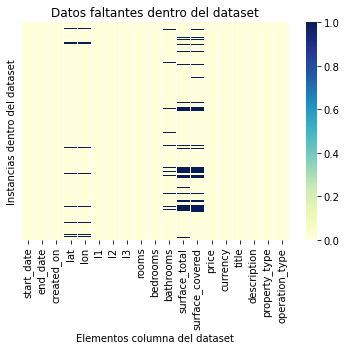

In [4]:
#VISUALIZAMOS LOS DATOS FALTANTES

sns.heatmap(data.isnull(),yticklabels=False,cmap='YlGnBu')
plt.title('Datos faltantes dentro del dataset')
plt.xlabel('Elementos columna del dataset')
plt.ylabel('Instancias dentro del dataset')

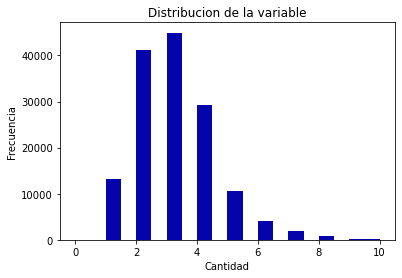

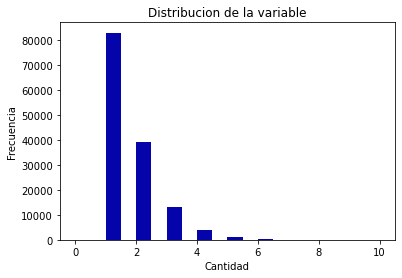

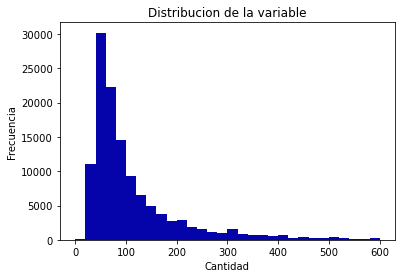

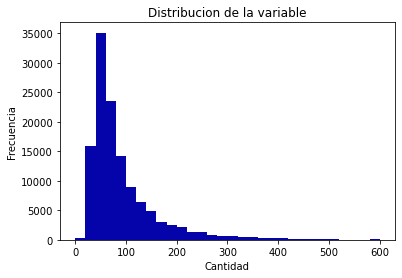

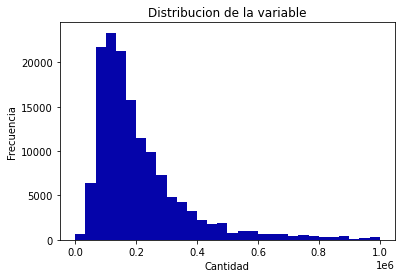

In [62]:
#¿Cómo es la distribución de cada variable? 
#OBSERVAMOS LAS DISTRIBUCIONES DE LAS VARIABLES


plt.hist(x=df['rooms'],bins=20,range=[0,10],color='#0504aa')
plt.title('Distribucion de la variable')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.show()

plt.hist(x=df['bathrooms'],bins=20,range=[0,10],color='#0504aa')
plt.title('Distribucion de la variable')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.show()

plt.hist(x=df['surface_total'],bins=30,range=[0,600],color='#0504aa')
plt.title('Distribucion de la variable')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.show()

plt.hist(x=df['surface_covered'],bins=30,range=[0,600],color='#0504aa')
plt.title('Distribucion de la variable')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.show()

plt.hist(x=df['price'],bins=30,range=[0,1000000],color='#0504aa')
plt.title('Distribucion de la variable')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.show()


3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

property_type
Casa                21521
Casa de campo         322
Cochera               259
Departamento       107326
Depósito              265
Local comercial       325
Lote                 1312
Oficina               658
Otro                  374
PH                  14298
dtype: int64
0         107326
1          14298
2          14298
3          14298
4          14298
           ...  
146655    107326
146656    107326
146657    107326
146658    107326
146659    107326
Name: freq, Length: 146660, dtype: int64


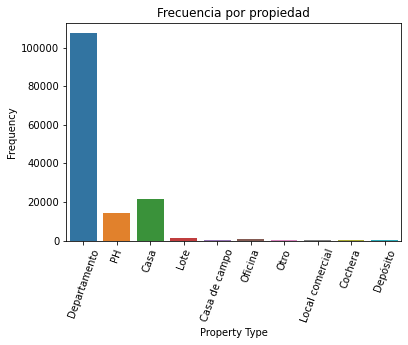

In [5]:
# TIPOS DE PROPIEDAD

freq_property_type=df.groupby(['property_type']).size()
print(freq_property_type)

df['freq']=df.groupby(by='property_type')['property_type'].transform('count')
print(df['freq'])

sns.barplot(x=df['property_type'],y=df['freq'],data=df)
plt.title('Frecuencia por propiedad')
plt.ylabel('Frequency')
plt.xlabel('Property Type')
plt.xticks(rotation=70)
plt.show()

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

<function matplotlib.pyplot.show(close=None, block=None)>

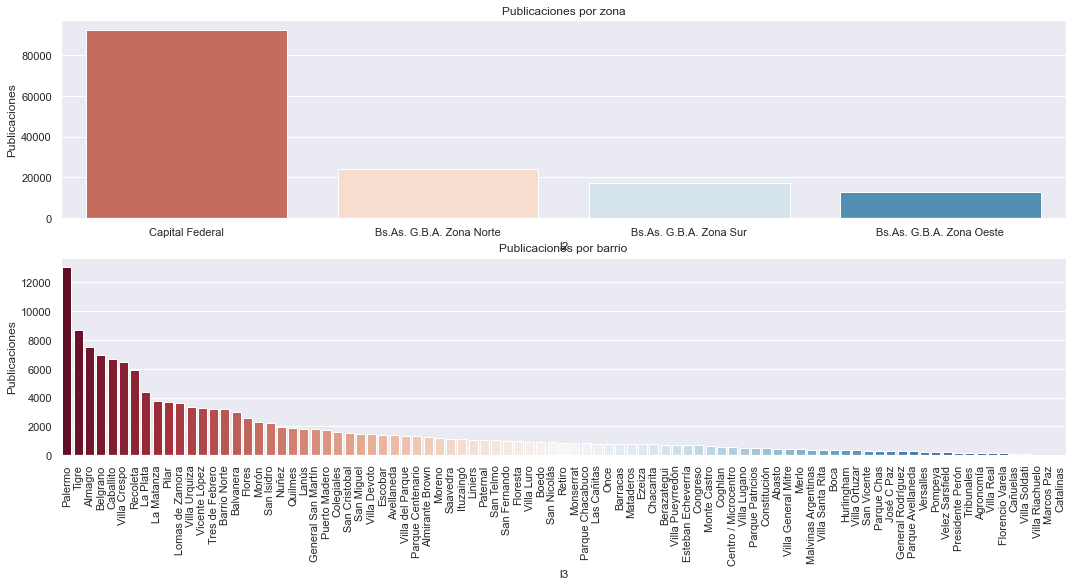

In [66]:
fig, axarr = plt.subplots(2, figsize=(18,8))
sns.countplot(df['l2'], ax = axarr[0], palette='RdBu',order = df['l2'].value_counts().index)
sns.countplot(df['l3'], ax = axarr[1], palette='RdBu',order = df['l3'].value_counts().index)
plt.setp(plt.xticks()[1],rotation = 90)

plt.setp(axarr[0], ylabel='Publicaciones')
plt.setp(axarr[1], ylabel = 'Publicaciones')

axarr[0].title.set_text('Publicaciones por zona')
axarr[1].title.set_text('Publicaciones por barrio')

plt.show

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [5]:
#FILTRAMOS POR LAS TRES CLASES MAS ABUNDANTES
biggest_region = data.l2.value_counts().index[0]
zona = data.loc[(data.l2 == biggest_region)]
df = zona.loc[zona.property_type.isin(['Departamento','Casa', 'PH'])]
df.shape


(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

        rooms  bedrooms  bathrooms  surface_total  surface_covered     price  \
0         7.0       7.0        2.0          140.0            140.0  153000.0   
1         2.0       1.0        2.0           70.0             58.0  159000.0   
2         2.0       1.0        1.0           45.0             45.0  125000.0   
3         2.0       1.0        1.0           85.0             50.0  295000.0   
4         2.0       1.0        1.0           50.0             35.0   40000.0   
...       ...       ...        ...            ...              ...       ...   
146655    2.0       1.0        1.0           54.0             48.0  165000.0   
146656    4.0       3.0        2.0          164.0             90.0  130000.0   
146657    1.0       1.0        1.0           50.0             35.0   73000.0   
146658    2.0       1.0        1.0           38.0             38.0   68000.0   
146659    3.0       2.0        1.0           75.0             75.0   98000.0   

          freq  
0       107326  
1    

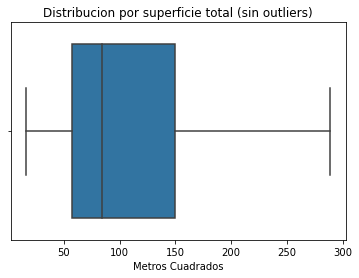

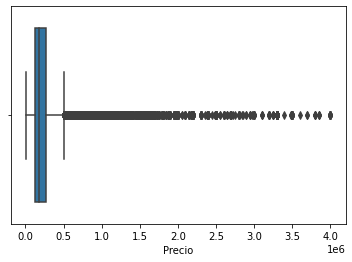

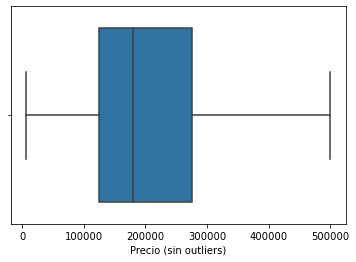

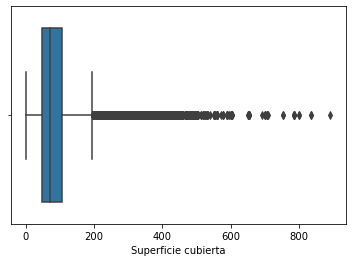

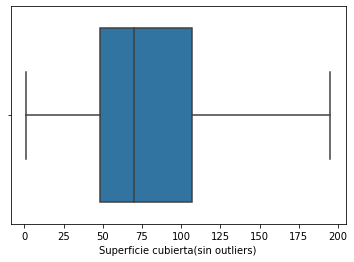

count    86679.000000
mean       136.757346
std        146.349671
min         16.000000
25%         57.000000
50%         84.000000
75%        150.000000
max       1000.000000
Name: surface_total, dtype: float64
count    8.667900e+04
mean     2.432388e+05
std      2.454769e+05
min      6.000000e+03
25%      1.250000e+05
50%      1.800000e+05
75%      2.750000e+05
max      4.000000e+06
Name: price, dtype: float64
count    86679.000000
mean         3.155886
std          1.319020
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         35.000000
Name: rooms, dtype: float64
count    86679.000000
mean        89.866980
std         64.987704
min          1.000000
25%         48.000000
50%         70.000000
75%        107.000000
max        891.000000
Name: surface_covered, dtype: float64


In [6]:
#REALIZAMOS EL FILTRADO DE LOS VALORES OUTLIERS QUE MAS PERJUDICA LA VISUALIZACION, PARA PODER TENER UNA VISIBILIDAD ADECUADA DE LOS DATOS

new_df=df.drop(['start_date','end_date','created_on','lat','lon','l1','l2','l3','currency','title','description','property_type','operation_type'],axis=1)
print(new_df)
new_df=new_df[new_df['surface_total']<=1000]
new_df=new_df[new_df['surface_total']>=15]
new_df=new_df[new_df['surface_total'] > new_df['surface_covered']]
print(new_df[new_df['surface_total'] >= new_df['surface_covered']].count())
new_df=new_df[new_df['price']<=4000000]
new_df.shape

#COMENZAMOS CON LA VISUALIZACION DE DATOS BUSCANDO DETECTAR DATOS ATIPICOS 
#HACEMOS DOS GRAFICAS POR VARIABLE, UNA QUE NOS MUESTRA LA VERDADERA DISTRIBUCION DE DATOS Y OTRA DONDE PODEMOS OBSERVARLOS ADECUADAMENTE OMITIENDO VALORES OUTLIERS
print(new_df['surface_total'].describe())
sns.boxplot(x=new_df['surface_total'],showfliers=False)
plt.xlabel('Metros Cuadrados')
plt.title('Distribucion por superficie total (sin outliers)')
plt.show()

sns.boxplot(x=new_df['price'])
plt.xlabel('Precio')
plt.show()

sns.boxplot(x=new_df['price'],showfliers=False)
plt.xlabel('Precio (sin outliers)')
plt.show()

sns.boxplot(x=new_df['surface_covered'])
plt.xlabel('Superficie cubierta')
plt.show()

sns.boxplot(x=new_df['surface_covered'],showfliers=False)
plt.xlabel('Superficie cubierta(sin outliers)')
plt.show()

#CHEQUEAMOS QUE LOS GRAFICOS REALIZADOS SEAN COMPATIBLES CON LA DESCRIPCION DE LAS VARIABLES
print(new_df['surface_total'].describe())
print(new_df['price'].describe())
print(new_df['rooms'].describe())
print(new_df['surface_covered'].describe())

#PODEMOS QUE HAY VARIABLES QUE ESTAN FUERTEMENTE DESBALANCEADAS, COMO SUPERFICIE CUBIERTA, QUE SI NO 
#REALIZAMOS UN FILTRADO ADECUADO NOS VA A COMPLICAR EL ARMADO DE GRAFICOS Y ESTUDIO DE LOS DATOS

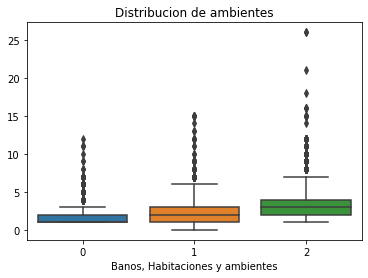

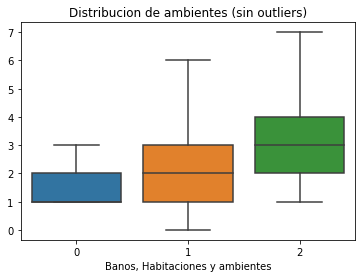

In [8]:
#LAS VARIABLES AMBIENTES, HABITACIONES Y BANOS LAS VISUALIZAMOS JUNTAS PARA PODER VER QUE HAY CIERTA RELACION ENTRE LAS MISMAS
sns.boxplot(data=(new_df['bathrooms'],new_df['bedrooms'],new_df['rooms']))
plt.xlabel('Banos, Habitaciones y ambientes')
plt.title('Distribucion de ambientes')
plt.show()

sns.boxplot(data=(new_df['bathrooms'],new_df['bedrooms'],new_df['rooms']),showfliers=False)
plt.xlabel('Banos, Habitaciones y ambientes')
plt.title('Distribucion de ambientes (sin outliers)')
plt.show()

In [ ]:
#PODEMOS VER QUE LAS VARIABLES CON MAS DATOS ATIPICOS SON SUPERFICIE TOTAL Y PRECIO, POR LO QUE 
#TRABAJAREMOS SOBRE ESAS VARIABLES PARA TENER UN MANEJO MAS COMODO DEL DATASET

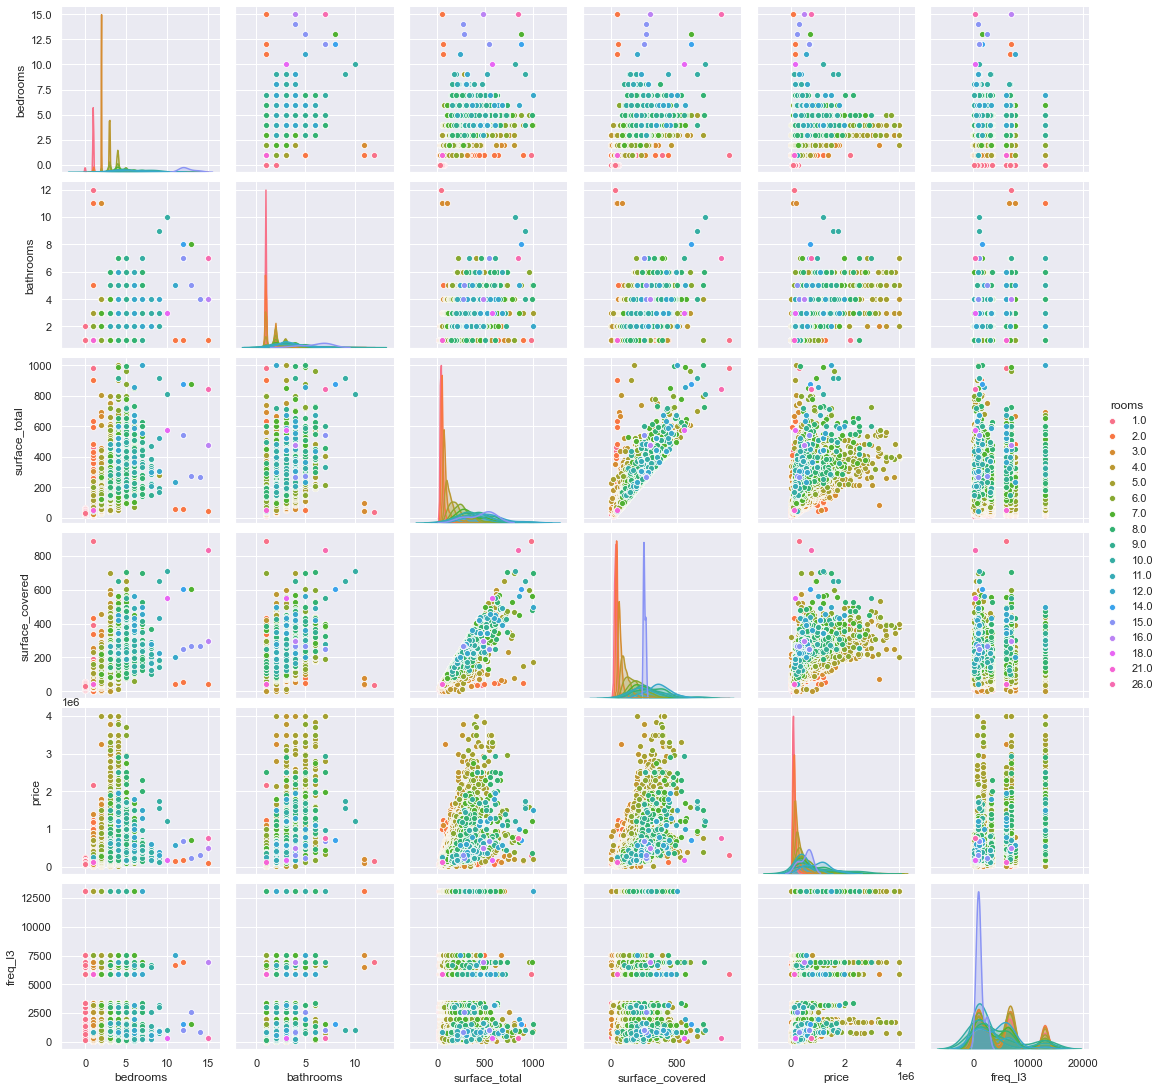

In [76]:
import warnings
warnings.filterwarnings('ignore')

sns.pairplot(new_df,hue='rooms')
plt.show()
#ELEGIMOS LA VARIABLE AMBIENTES PARA DISTINGUIR LOS DATOS YA QUE ES MUY REPRESENTATIVA DEL VALOR DE LA PROPIEDAD

In [48]:
#PODEMOS VER DE ESTA COMPARACION ENTRE VARIABLES QUE LOS DATOS LOS PRECIOS NO ESTAN TOTALMENTE DETERMINADOS POR EL TAMANO
#O CANTIDAD DE AMBIENTES DE DE LA PROPIEDAD, ENTONCES ESTUDIAREMOS LA CORRELACION EXACTA ENTRE LAS MISMAS.

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

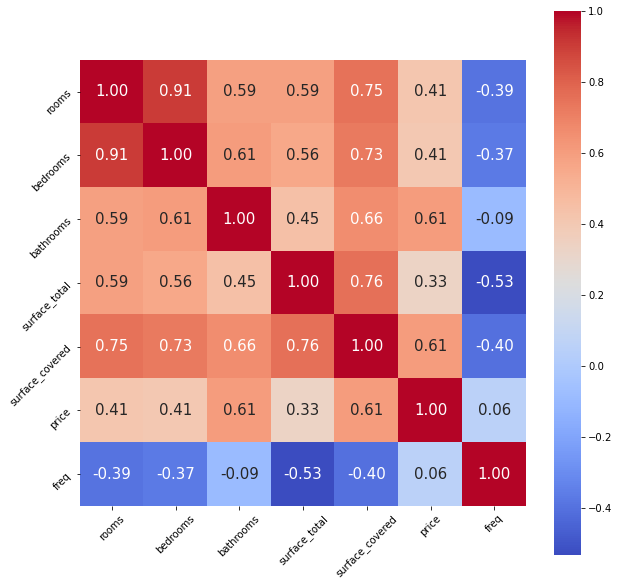

In [7]:
corr =new_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},           
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

#PODEMOS VER QUE LAS MEJORES VARIABLES PARA PREDECIR EL PRECIO SON SUPERFICIE TOTAL Y CUBIERTA 
#POR SU ALTO GRADO DE CORRELACION


### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


In [8]:
# Que tipo de propiedad tiene el precio por metro cuadrado mas alto? 


print(df.columns)
df['sqr_meter_price'] = df['price']/df['surface_covered']
print(df['sqr_meter_price'])

df.groupby(['property_type']).mean()

# El tipo de propiedad con el precio por metro cuadrado que tenemos es el Departamento, con 3388 dolares por metro cuadrado. 
# El sesgo que tenemos es que, en primer lugar, generalmente los departamentos se ubican en las zonas mas caras, y el 
# otro sesgo que tenemos es que al comparar por superficie cubierta no tomamos en consideracion los terrenos con parque, por ejemplo. 

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type', 'freq'],
      dtype='object')
0         1092.857143
1         2741.379310
2         2777.777778
3         5900.000000
4         1142.857143
             ...     
146655    3437.500000
146656    1444.444444
146657    2085.714286
146658    1789.473684
146659    1306.666667
Name: sqr_meter_price, Length: 146660, dtype: float64


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,freq,sqr_meter_price
property_type,,,,,,,,,,
Casa,-34.639914,-58.525606,4.499652,2.925654,2.137237,660.102807,249.149856,275932.848427,21521,1649.759263
Casa de campo,-34.669577,-58.691893,4.186335,2.760870,2.016611,4018.581395,315.228682,212242.826087,322,1170.119408
Cochera,-34.666807,-58.429020,1.011583,0.023166,1.222222,13.500000,13.500000,24255.984556,259,1100.000000
Departamento,-34.593853,-58.453715,2.756471,1.757813,1.508841,99.191757,85.276315,236746.743110,107326,3216.621093
Depósito,-34.680052,-58.491154,1.226415,0.090566,1.750000,624.375000,347.428571,885932.075472,265,1249.085594
Local comercial,-34.699634,-58.431119,1.566154,0.418462,1.584416,258.583333,156.909091,449184.064615,325,1470.489795
Lote,-34.695733,-58.491055,2.323933,1.320122,1.811321,2481.002837,215.393939,386830.370427,1312,1672.425843
Oficina,-34.611553,-58.429681,2.369301,1.404255,1.500000,81.956853,78.763926,183674.572948,658,2494.936293
Otro,-34.693353,-58.518309,3.842246,2.497326,2.191057,8249.772727,202.549550,671686.697861,374,2673.106793


### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [9]:
data=pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
print(data.shape)
df=pd.DataFrame(data)

biggest_region = data.l2.value_counts().index[0]
zona = data.loc[(data.l2 == biggest_region)]
df = zona.loc[zona.property_type.isin(['Departamento','Casa', 'PH'])]
print(df.shape)

(146660, 19)
(91485, 19)


In [10]:
new_df=df.drop(['start_date','end_date','created_on','lat','lon','l1','l2','l3','currency','title','description','property_type','operation_type'],axis=1)
#print(new_df)
new_df=new_df[new_df['surface_total']<=1000]
new_df=new_df[new_df['surface_total']>=15]
new_df=new_df[new_df['price']<=4000000]
new_df=new_df.dropna()
print(new_df.shape)
new_df.describe()
new_df=pd.DataFrame(new_df)


(81019, 6)


In [82]:
y=new_df.price

In [83]:
X=new_df.drop('price',axis=1)
X.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered
count,81019.000000,81019.000000,81019.000000,81019.000000,81019.000000
mean,3.009652,2.002037,1.553821,95.361779,84.928535
std,1.308602,1.049673,0.852672,77.253578,156.133119
min,1.000000,0.000000,1.000000,15.000000,1.000000
25%,2.000000,1.000000,1.000000,49.000000,44.000000
50%,3.000000,2.000000,1.000000,71.000000,63.000000
75%,4.000000,3.000000,2.000000,111.000000,96.000000
max,26.000000,15.000000,14.000000,1000.000000,17220.000000


In [84]:
#COMENZAMOS NUESTRO MODELO DE PREDICCION CON UN ARBOL DE DECISION

model = DecisionTreeRegressor(random_state=1)
model.fit(X,y)

DecisionTreeRegressor(random_state=1)

In [85]:
print(X.head())
print(model.predict(X.head()))

   rooms  bedrooms  bathrooms  surface_total  surface_covered
0    7.0       7.0        2.0          140.0            140.0
1    2.0       1.0        2.0           70.0             58.0
2    2.0       1.0        1.0           45.0             45.0
3    2.0       1.0        1.0           85.0             50.0
5    2.0       1.0        1.0           56.0             56.0
[153000.         169366.66666667 118884.59121622 212500.
 132905.125     ]


In [87]:
#AL SER UN PROBLEMA DE REGRESION, UTILIZAREMOS LAS METRICAS APROPIADAS PARA ESTOS PROBLEMAS. 
#COMENZAREMOS POR EL MEAN ABSOLUTE ERROR (MAE)

predicted_home_prices = model.predict(X)
mean_absolute_error(y,predicted_home_prices)

24575.25013988774

In [88]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
model = DecisionTreeRegressor()
model.fit(train_X,train_y)

price_predictions = model.predict(val_X)
print(mean_absolute_error(val_y,price_predictions))

51285.38749379437


In [89]:
#BUSCAMOS LA CANTIDAD DE NODOS MAS ACERTADA PARA ESTA METRICA

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

# compare MAE with differing values of max_leaf_nodes

for max_leaf_nodes in [5,10,15,20,25,30]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))
    
tree = DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)   

#PODEMOS CONCLUIR QUE EL MEJOR COSTO CONTRA BENEFICIO ES ENTRE 10 Y 15 NODOS. 

Max leaf nodes: 5  		 Mean Absolute Error:  105197
Max leaf nodes: 10  		 Mean Absolute Error:  89271
Max leaf nodes: 15  		 Mean Absolute Error:  87436
Max leaf nodes: 20  		 Mean Absolute Error:  84838
Max leaf nodes: 25  		 Mean Absolute Error:  81550
Max leaf nodes: 30  		 Mean Absolute Error:  81059


In [12]:
#SEGUIMOS NUESTRO ANALISIS CON EL MODELO DE KNN

X = new_df[['rooms','bedrooms','bathrooms','surface_covered','surface_total']]
#X = new_df[['rooms','surface_total']]
# X = data.drop("target", axis=1)
y = new_df.price

print(X.head())
print(y.head())

   rooms  bedrooms  bathrooms  surface_covered  surface_total
0    7.0       7.0        2.0            140.0          140.0
1    2.0       1.0        2.0             58.0           70.0
2    2.0       1.0        1.0             45.0           45.0
3    2.0       1.0        1.0             50.0           85.0
5    2.0       1.0        1.0             56.0           56.0
0    153000.0
1    159000.0
2    125000.0
3    295000.0
5    150000.0
Name: price, dtype: float64


In [13]:
clf = KNeighborsRegressor()

clf.fit(X,y)

KNeighborsRegressor()

In [93]:
y_pred = clf.predict(X)

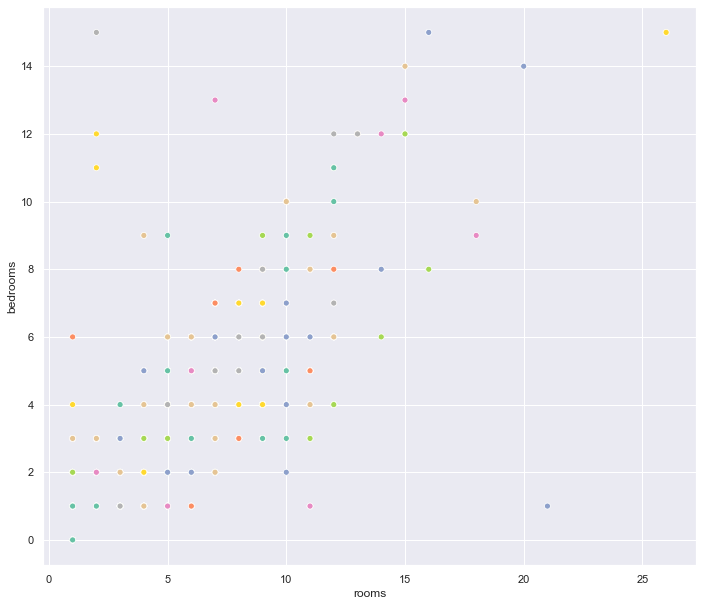

In [94]:
plt.figure()
ax = sns.scatterplot(X.iloc[:,0], X.iloc[:,1], hue=y.values, palette='Set2')
plt.legend().remove()

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

In [15]:
n_neighbors = 15
clf_knn = KNeighborsRegressor(n_neighbors =n_neighbors )

In [99]:
clf_knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=15)

In [100]:
y_train_pred = clf_knn.predict(X_train)
y_test_pred = clf_knn.predict(X_test)

In [101]:
#PARA PONER A PRUEBA NUESTROS MODELOS, LO COMPARAMOS CON UN BENCHMARK DE REGRESION LINEAL Y COMPARAMOS LOS RESULTADOS DE LOS MISMOS

linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=30, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [102]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [103]:
print(linear_model.coef_, linear_model.intercept_)

[ 1.16192981e+04 -6.29435576e+04  1.32759235e+05  1.07004571e+02
  2.05427168e+03] -56646.24807941506


In [104]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((56713, 5), (24306, 5), (56713,), (24306,))

In [105]:
# Plotting errors of models


# Specifying model
tree_regressor = DecisionTreeRegressor(max_depth=5) 

# Training model
tree_regressor.fit(X_train,y_train)

# Prediction
y_preds_tree_train = tree_regressor.predict(X_train)
y_preds_tree_test = tree_regressor.predict(X_test)

In [106]:
#  K-Nearest Neighbors

# Specifying model
knn_regressor = KNeighborsRegressor() # Default n_neighbors = 5

# Training model
knn_regressor.fit(X_train,y_train)

# Prediction
y_preds_knn_train = knn_regressor.predict(X_train)
y_preds_knn_test = knn_regressor.predict(X_test)

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 199173.83253528475
Raíz del error cuadrático medio en Test: 202449.36540361535


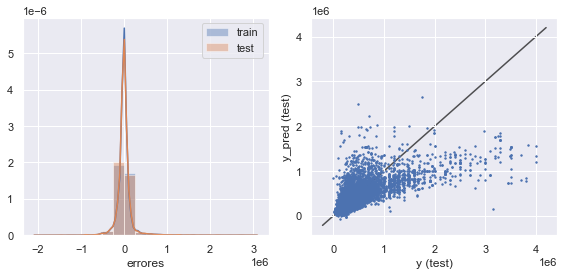

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 169200.1754118897
Raíz del error cuadrático medio en Test: 174352.7367379676


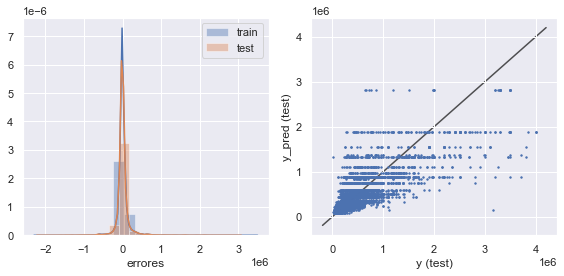

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 121064.50152632296
Raíz del error cuadrático medio en Test: 154991.0184846315


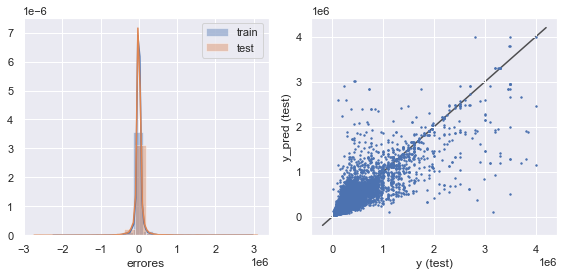

In [107]:
#SELECCIONAMOS COMO BENCHMARK LA REGRESION LINEAL
#COMPARAMOS LOS VALORES OBTENIDOS DEL BENCHMARK Y LOS COMPARAMOS CON LOS OBTENIDOS CON ARBOLES DE DECISION Y VECINOS MAS CERCANOS

from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()
   
#PODEMOS OBSERVAR QUE LOS MEJORES VALORES LOS OBTENEMOS CON EL MODELO DE VECINOS MAS CERCANOS.

In [16]:
from sklearn import tree
if tree_regressor.max_depth < 4:
    plt.figure(figsize = (10,8))
    tree.plot_tree(tree_regressor, filled = True)
    plt.show()

NameError: name 'tree_regressor' is not defined

#METODOLOGIA Y MEJORAS:

#PARTIENDO DE LA BASE QUE ESTA ES UNA PRIMERA APROXIMACION AL MUNDO DEL MACHINE LEARNING, CREO QUE LA ESTRUCTURA DEL PROYECTO NOS ORIENTO
#A PODER PONER EN PRACTICA DE MANERA INTEGRAL LO APRENDIDO A LOS LARGO DEL PRIMER BLOQUE DEL CURSO. HEMOS APRENDIDO A LEER, MANEJAR Y VISUALIZAR
#EL SET DE DATOS ADECUADAMENTE. FINALMENTE, HICIMOS UN PRIMER MODELO SIMPLE DE APRENDIZAJE AUTOMATICO, QUE SERA LA BASE PARA APRENDIZAJES MAS PROFUNDOS
#EN ESTA MATERIA.  A PARTIR DE DICHO ANALISIS PODEMOS CONCLUIR QUE EL MEJOR MODELO DE REGRESION A  UTILIZAR PARA EL PROBLEMA PROPUESTO ES 'KNN' YA QUE LA METRICA UTILIZADA (RMSE) ES MENOR QUE LA RESULTANTE UTILIZANDO EL REGRESOR DE ARBOL D que la resultante utilizando el Regresor de árbol de decisión

##Conclusion
Observando el último gráfico podemos concluir que el mejor modelo de regresión a utilizar para el problema propuesto es 'KNN' ya que la métrica utilizada (RMSE) es menor que la resultante utilizando el Regresor de árbol de decisión. Asimismo, al observar la gráfica de la distribución de los residuales de los errores y determinar su desviación estándar en cada modelo, se puede observar que la desviación estándar es menor en el modelo de Vecinos más cercanos.
   La información que no usamos fueron variables como la región y los barrios. Lo que me llevó a investigar cómo incluir estos datos en los modelos, y descubrí que utilizando un codificador de etiquetas (en el que se asignan diferentes enteros a un solo valor) los algoritmos tendrían en cuenta estos atributos al tomar decisiones. Y, en efecto, ambos modelos mejoraron su rendimiento.
   Siendo crítico, no he escalado el conjunto de datos en el paso de preprocesamiento para el modelo 'KNN', que posiblemente podría afectar positivamente al modelo.